In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
diabetes_data = pd.read_csv(r'C:\Users\NDE\Downloads\diabetes.csv')

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.shape

(768, 9)

In [5]:
#zero not allowed in Glucose, Blood Pressure, Skin Thikness, Insulin & BMI level to have better accuracy
# So replace all zeros with the mean value
zero_not_accepted = [ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in zero_not_accepted:
    diabetes_data[column] = diabetes_data[column].replace(0, np.NaN)
    mean = int(diabetes_data[column].mean(skipna=True))
    diabetes_data[column] = diabetes_data[column].replace(np.NaN, mean)
    

In [6]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [7]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [9]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.706000,70.920000,27.726000,141.952000,30.880200,0.429734,31.190000
1,4.865672,142.160448,75.123134,31.686567,180.149254,35.381343,0.550500,37.067164


In [11]:
#Choosing X and Y Features
X = diabetes_data.drop(columns={'Outcome'})
Y = diabetes_data['Outcome']


In [12]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [13]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [14]:
#Data Standardization
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [15]:
print(standardized_data)

[[ 0.63994726  0.86525364 -0.03198993 ...  0.16724016  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20601255 -0.5283186  ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01595708 -0.69376149 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02243187 -0.03198993 ... -0.90976751 -0.68519336
  -0.27575966]
 [-0.84488505  0.14195434 -1.02464727 ... -0.34215536 -0.37110101
   1.17073215]
 [-0.84488505 -0.94299462 -0.19743282 ... -0.29849289 -0.47378505
  -0.87137393]]


In [16]:
X = standardized_data

In [17]:
#Splitting data to training and test data
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [19]:
#check for the value of K in our Y_test for our KNN classifier
import math
math.sqrt(len(Y_test))

12.409673645990857

In [46]:
#Training the model
model =KNeighborsClassifier(n_neighbors=7, p=2, metric='euclidean')
model.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [47]:
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [48]:
print(train_data_accuracy*100)

79.64169381107492


In [49]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, Y_test)

In [50]:
print(test_data_accuracy*100)

79.87012987012987


In [51]:
cm = confusion_matrix(Y_test, X_test_prediction)

In [52]:
print(cm)

[[91 16]
 [15 32]]


In [53]:
model.classes_

array([0, 1], dtype=int64)

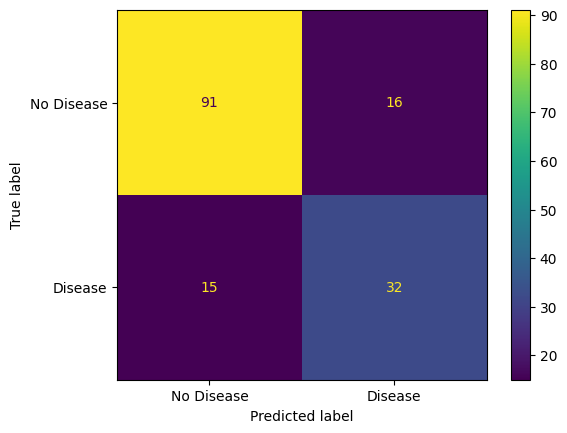

In [54]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels =['No Disease','Disease'])
cm_display.plot()

In [55]:
tn, fp, fn, tp = confusion_matrix(Y_test, X_test_prediction).ravel()
tn, fp, fn, tp
matrix = classification_report(Y_test, X_test_prediction)
print('Classifivation Report: \n', matrix)

Classifivation Report: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       107
           1       0.67      0.68      0.67        47

    accuracy                           0.80       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.80      0.80      0.80       154

